In [1]:
import warnings
import pandas as pd
import numpy as np
import scanpy as sc
import episcanpy.api as epi
from PRESENT import PRESENT_function

warnings.filterwarnings("ignore")
sc.set_figure_params(dpi=80, figsize=(4,4), facecolor="white")

## Analyze stage 44 axolotl brain using PRESENT

In [2]:
adata = sc.read_h5ad("Data/stage44.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 1477 × 12704
    obs: 'CellID', 'Batch', 'cell_id', 'Annotation'
    var: 'Gene'
    uns: 'Annotation_colors', 'Batch1_Adult_telencephalon_rep2_DP8400015234BLA3_1', 'Injury_control_FP200000239BL_E3', 'Meta_telencephalon_rep1_DP8400015234BLB2_1', 'Stage44_telencephalon_rep2_FP200000239BL_E4', 'Stage54_telencephalon_rep2_DP8400015649BRD6_2', 'Stage57_telencephalon_rep2_DP8400015649BRD5_1', 'angle_dict'
    obsm: 'spatial'
    layers: 'counts'


### Run PRESENT model

In [3]:
adata = PRESENT_function(
    spatial_key = "spatial", ## obsm key under which to load the spatial matrix of spots
    adata_rna = adata, ## The RNA raw fragment count matrix of spots in anndata.AnnData format
    gene_min_cells = 1, ## Minimum number of cells expressed required for a gene to pass filtering
    num_hvg = 3000, ## Number of highly variable genes to select for RNA data
    nclusters = adata.obs["Annotation"].nunique(),
    device = "cuda" ## Device used for training: cuda or cpu
)
print(adata)

Loading data and parameters...


Input data has been loaded


Computing METIS partitioning...
Done!
Model training:  29%|██████▉                 | 29/100 [00:04<00:11,  5.98it/s, NLL_loss=0.111, BNN_loss=0.0236, MSE_loss=0.0185, ES counter=20, ES patience=20]


Early stop the training process


Succeed to find 10 clusters at resolution 1.031
AnnData object with n_obs × n_vars = 1477 × 50
    obs: 'CellID', 'Batch', 'cell_id', 'Annotation', 'n_genes', 'leiden', 'LeidenClusters'
    uns: 'neighbors', 'leiden'
    obsm: 'spatial', 'embeddings'
    obsp: 'distances', 'connectivities'


### Visualization

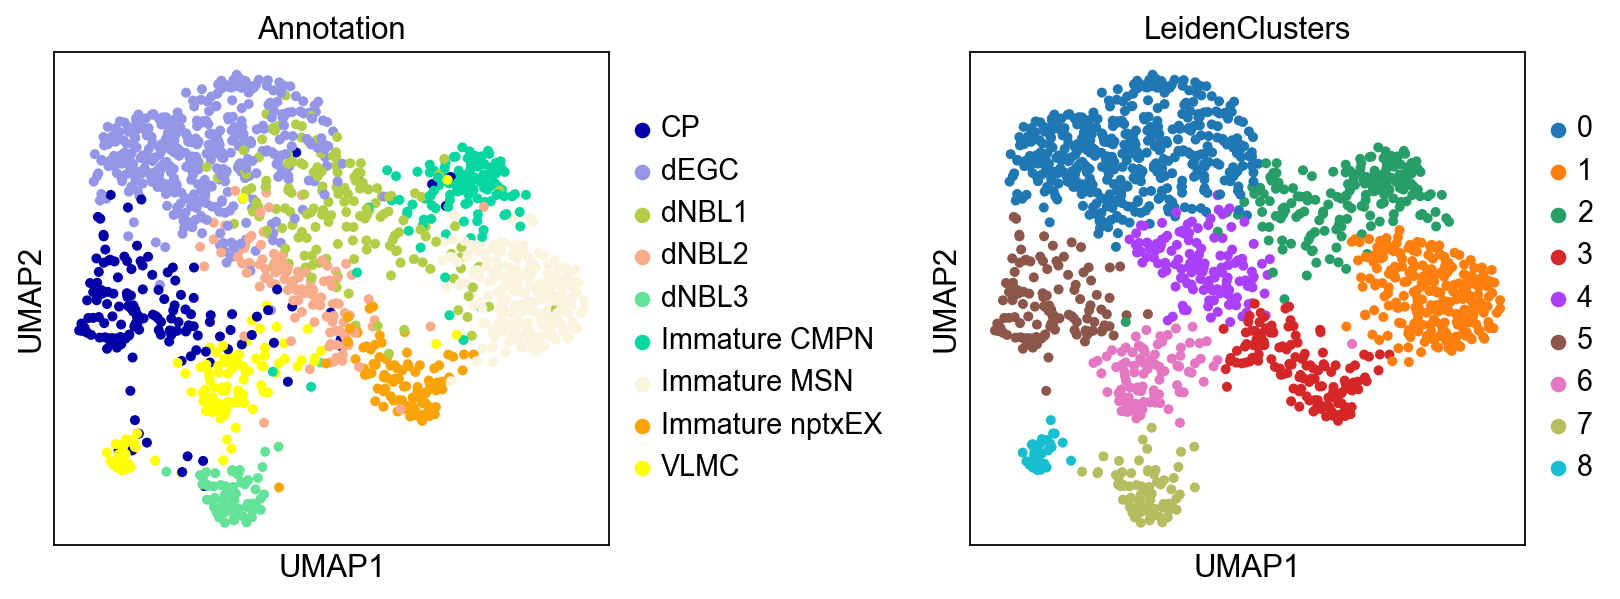

In [4]:
sc.pp.neighbors(adata, use_rep="embeddings")
sc.tl.umap(adata)
sc.pl.umap(adata, color=["Annotation", "LeidenClusters"], wspace=0.5)

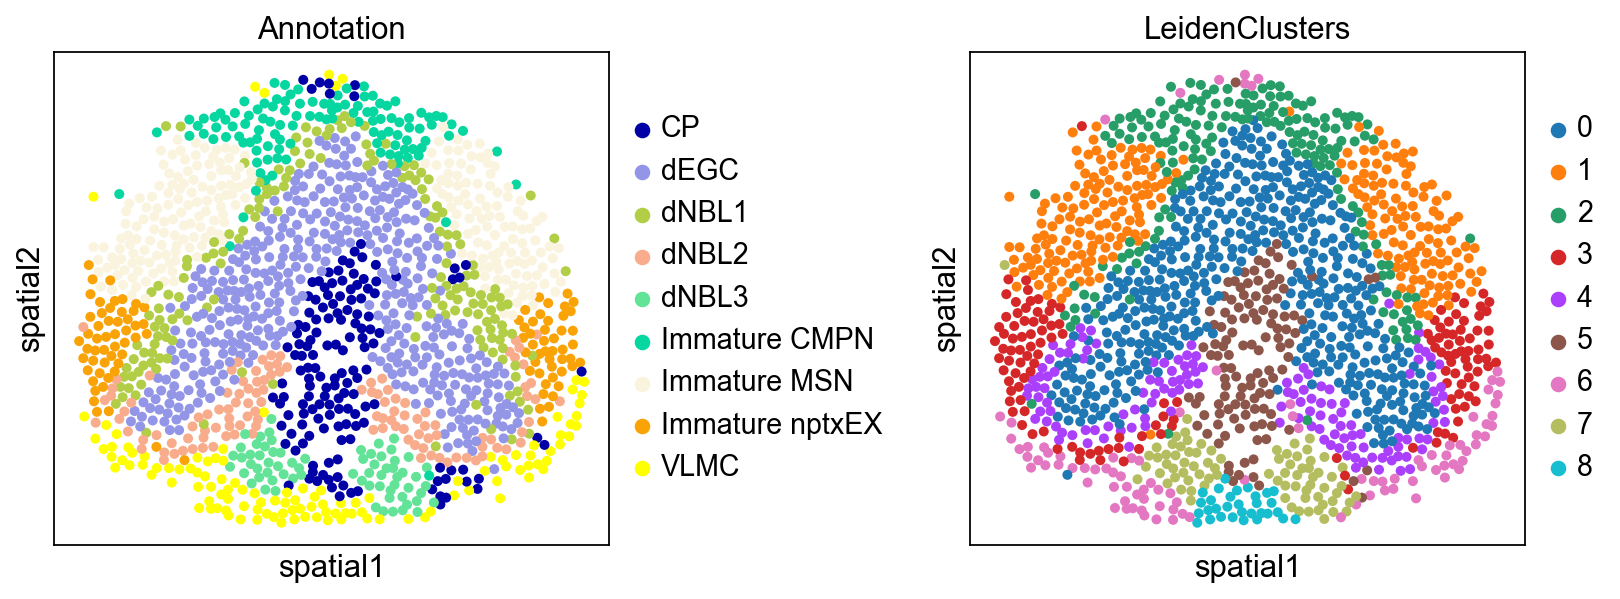

In [5]:
sc.pl.embedding(adata, basis="spatial", color=["Annotation", "LeidenClusters"], wspace=0.5)